# Logistic Regression & Classification

- We will be working with Tatanic Data Set from Keggle. 
- We will try to predict a classification: survival or deceased. We will begin with implementing Logistic Regression in Python for classification. 
- We will use semi-cleaned version of the titanic data set. If using data set hosted on Keggle, you may need to do some additional cleaning. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

tita_df = pd.read_csv("C:\\workspace\\D02_SL_AI_ML\\02_cohort_02_may_2022\\01_DS_with_Python\\11_June_24\\titanic.csv")
tita_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Data Analysis (EDA)
- Start by checking the missing data 

- Create a simple heatmap by using seaborn to see which data set has missing values. 

- Whenever a given feature set has more than 40% missing data, we will drop that feature. 

In [3]:
tita_df.shape

(891, 12)

In [4]:
tita_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

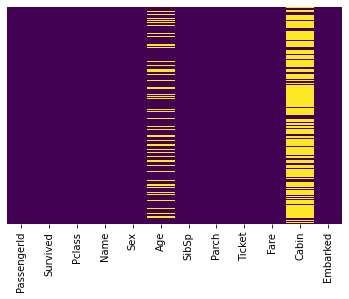

In [5]:
sns.heatmap(tita_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Roughly 20% of the Age data is missing. The proportion of Age missing is likely small enough for a reasonable replacement with some form of imputation. 
- Looking at the Cabin column, it looks like we are just missing too many data to make something useful at basic level. This is a good candidate to drop it completely or change it to another feature like "CabinKnown: 1 or 0"

Lets continue with some other visualizations on the data. Check the self-learning videos for these plots. 

## Data Cleanup 
- Columns to be dropped 
    - Name, PassengerId, Ticket, Embarked, Cabin
- Columns to be processed further
    - Survived (y)
    - Pclass, Sex, Age, Sibsp, Parch, Fare, 

- Dummy encoding
    - For Sex (Gender) column
    - Outliers processing on the Age. 
- Filling NaN values
    - Fill the 'Fare' according to the 'Pclass' (groupby on the Pclass and calculate Fare by mean of the Fare column)
    - Show the code to calculate average value of the Fare w.r.t. every class.
    - Fill the 'Age' according to the 'Sex' (groupby on the 'Sex' and calculate Age by mean of the Fare column)

In [6]:
tita_df.drop(['Name', 'PassengerId', 'Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
tita_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [7]:
from sklearn import preprocessing

label_enc = preprocessing.LabelEncoder()
label_enc.fit_transform(tita_df['Sex'].unique())

array([1, 0])

In [8]:
# get_dummies code to covert gender column
# import pandas as pd

# train = tita_df.get_dummies(tita_df, columns = ['Sex'], drop_first=True)
# train

In [9]:
tita_df['Sex'] = label_enc.fit_transform(tita_df['Sex'])
tita_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


<AxesSubplot:>

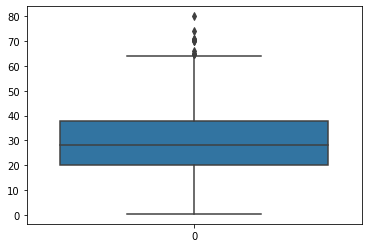

In [10]:
import seaborn as sns
sns.boxplot(data = tita_df['Age'])

<AxesSubplot:>

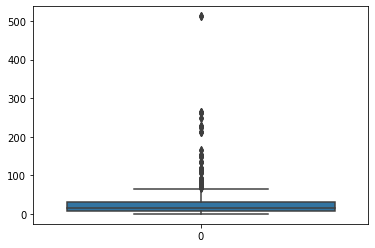

In [11]:
sns.boxplot(data = tita_df['Fare'])

In [12]:
tita_df.groupby(['Pclass'])['Fare'].value_counts()

Pclass  Fare   
1       26.5500    15
        52.0000     7
        0.0000      5
        30.0000     5
        30.5000     5
                   ..
3       15.5500     1
        17.4000     1
        21.6792     1
        22.0250     1
        22.5250     1
Name: Fare, Length: 255, dtype: int64

In [13]:
tita_df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [14]:
tita_df['Age'].fillna(tita_df['Age'].median(), inplace=True)

<AxesSubplot:>

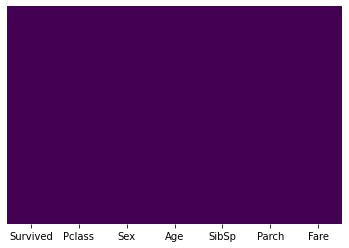

In [15]:
sns.heatmap(tita_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Logistic Regression 
<img src="https://www.saedsayad.com/images/LogReg_1.png" width="450"/>

- It is a classification algorithm. It is a statistical method for predicting binary classes and computes the probability of an event occurance. 
- It starts with a linear model as shown and b0, b1 are the coefficients of the features (x)
- On top of the linear model, a sigmoid function is used. The values of linear model are fed into the sigmoid function, which returns the probability of that event occuring. 
- As probability is always between 0 - 1, the classification is done between 0 and 1. 
- The sigmoid model uses the cutoff/threshold of 0.5 i.e. the values above 0.5 are considered as 1 and lesser values cosidered as 0. 
- Look at the proof of sigmoid function. 

## Create the training and test data split

In [16]:
x_props = tita_df.drop('Survived', axis=1)
x_props.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [17]:
y_target = tita_df['Survived']
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
# Once all the feature data is extracted, we can do the 70 / 30 data split using:
from sklearn.model_selection import train_test_split

# train_test_split() function is also going to do the schufling of the data. 
# random_state parameter is provided to ensure same schufled data is presented each time. 
# we do not want different random values each time. 
x_train, x_test, y_train, y_test = train_test_split(x_props, y_target, test_size=0.30, random_state=101)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(623, 6) (623,)
(268, 6) (268,)


In [19]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
520,1,0,30.0,0,0,93.5000
510,3,1,29.0,0,0,7.7500
446,2,0,13.0,0,1,19.5000
2,3,0,26.0,0,0,7.9250
691,3,0,4.0,0,1,13.4167
...,...,...,...,...,...,...
575,3,1,19.0,0,0,14.5000
838,3,1,32.0,0,0,56.4958
337,1,0,41.0,0,0,134.5000
523,1,0,44.0,0,1,57.9792


In [20]:
y_train

520    1
510    1
446    1
2      1
691    1
      ..
575    0
838    1
337    1
523    1
863    0
Name: Survived, Length: 623, dtype: int64

## Training and Prediction

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [23]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
331,1,1,45.5,0,0,28.500
700,1,0,18.0,1,0,227.525
748,1,1,19.0,1,0,53.100
751,3,1,6.0,0,1,12.475
481,2,1,28.0,0,0,0.000


In [24]:
predictions = logreg.predict(x_test)
predictions

# Predict() function accepts 2D array input values. 

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [25]:
x_test_2 = x_test.copy()
x_test_2['predicted'] = predictions
x_test_2['actual'] = y_test
x_test_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,predicted,actual
331,1,1,45.5,0,0,28.500,0,0
700,1,0,18.0,1,0,227.525,1,1
748,1,1,19.0,1,0,53.100,1,0
751,3,1,6.0,0,1,12.475,0,1
481,2,1,28.0,0,0,0.000,0,0


## Evaluation of the Predictions
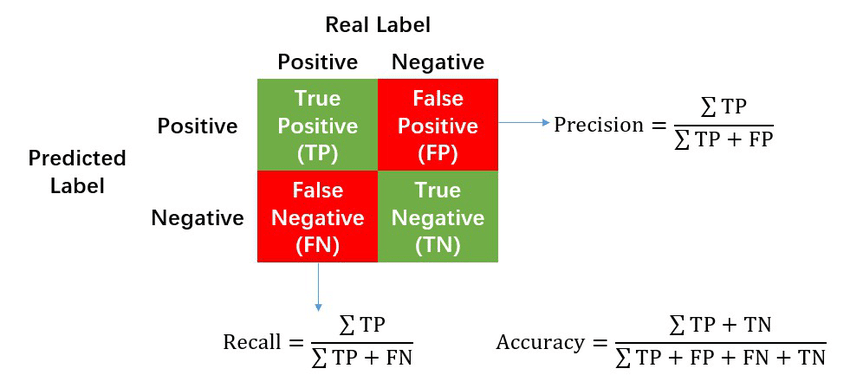
- This is purely w.r.t. to classification algorithm. It has nothing to do with logistic or any specific implementation.
- 

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

precision_score(y_test, predictions) # as max as possible, with max value = 1.

0.7708333333333334

In [27]:
recall_score(y_test, predictions) # as max as possible, with max value = 1.

0.6491228070175439

In [28]:
accuracy_score(y_test, predictions) # as max as possible, with max value = 1.

0.7686567164179104

In [29]:
print(predictions.size)
print(y_test.size)

268
268


<AxesSubplot:>

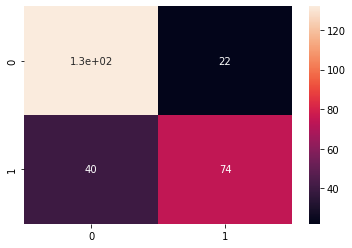

In [30]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

# NLP - Natural Language Processing

- Just like sklearn package handle the ML, NLP handle the text data
    - Data can be one line (sentence), multiple lines, a paragraph, or a unstructured data. 
    - We can not use dummy encoding, we can not use weights. 
    
- NLP packages
    - nltk - natural language toolkit
    - spacy
    - gensim

- NLP Steps
    - Data cleaning
        - lower casing
    - Dimension engineering
        - They are same as features 
        - Each word comes out as a feature
            - Important to reduce the feature size
            - In a paragraph, the size of words can explode 
        - Remove the stop words (prepositions, adjectives, punctation marks, etc.)
        - Use techniques: stemming, lemmetisation
            - working, worked, works, work -> work
        
        - Stemming: chopping the suffix of the word (sometimes we may have words with no meaning)
        - Lemmatisation: selecting the word root following the dictionary methods.
    - After dimension engineering, we arrive with the tokens (important words)
        - Word tokenizers (works at word level)
            - paragraph/sentence -> words 
            - Word count 
        - Sentence tokenizers (works at sentence level)
            - Paragraph -> sentences 
            - Sentence count

    - Typos can not be handled (limitation of NLP)

In [40]:
import nltk

filename = 'C:\\workspace\\D02_SL_AI_ML\\02_cohort_02_may_2022\\01_DS_with_Python\\11_June_24\\FP.txt'
file = open(filename, 'r')
text = file.read()
file.close()

- From the available text, we have sentences of different sizes. 
- We can run the classification model on these sentences from the text. 
    - Sentences have different types. For example, some review comment convey about info about the program:
        - review1: cost 
        - review1: infra
        - review3: study
        - review4: faculty
    
- On this kind of data, a classification model can be done. 
    - Predefined mapping between X and Y.
    - A label is provided for each sentence. This is the decision of the "business". 
    - So we have X (review sentences) and Y (labels)
    - We perform cleanup and dimension engineering on the sentences. At the end of this step, we are left with important base words 
    - These base words are converted to number forms as algorithm does not understand the text data. 
    
- Sentiment scoring (or analysis)
    - When no label data is provided, we need to fund out if the reviews are good, bad, etc. 
    - To analyse the feedback to know the gain and pain areas of customers. 
    - Sentences and sentiments
        - review1: positive? 
        - review1: negative?
        - review3: neutral?
        - review4: negative?
        
- Every package (nltk, etc.) has a dictionary of words and corresponding score. 


In [41]:
text = text.lower()
text

'   an enterprise that decides to use ip addresses out of the address\n   space defined in this document can do so without any coordination\n   with iana or an internet registry. the address space can thus be used\n   by many enterprises. addresses within this private address space will\n   only be unique within the enterprise, or the set of enterprises which\n   choose to cooperate over this space so they may communicate with each\n   other in their own private internet.\n\n   as before, any enterprise that needs globally unique address space is\n   required to obtain such addresses from an internet registry. an\n   enterprise that requests ip addresses for its external connectivity\n   will never be assigned addresses from the blocks defined above.\n\n   in order to use private address space, an enterprise needs to\n   determine which hosts do not need to have network layer connectivity\n   outside the enterprise in the foreseeable future and thus could be\n   classified as private. 

In [46]:
# Split the text into sentences and tokens. 
# spacy, gensin

from nltk import sent_tokenize, word_tokenize
#nltk.download('punkt')

sentences = sent_tokenize(text)
for ind, val in enumerate (sentences):
    display (ind, val)
    
#display(len(sentences))
    

0

'   an enterprise that decides to use ip addresses out of the address\n   space defined in this document can do so without any coordination\n   with iana or an internet registry.'

1

'the address space can thus be used\n   by many enterprises.'

2

'addresses within this private address space will\n   only be unique within the enterprise, or the set of enterprises which\n   choose to cooperate over this space so they may communicate with each\n   other in their own private internet.'

3

'as before, any enterprise that needs globally unique address space is\n   required to obtain such addresses from an internet registry.'

4

'an\n   enterprise that requests ip addresses for its external connectivity\n   will never be assigned addresses from the blocks defined above.'

5

'in order to use private address space, an enterprise needs to\n   determine which hosts do not need to have network layer connectivity\n   outside the enterprise in the foreseeable future and thus could be\n   classified as private.'

6

'such hosts will use the private address space\n   defined above.'

7

'private hosts can communicate with all other hosts\n   inside the enterprise, both public and private.'

8

'however, they cannot\n   have ip connectivity to any host outside of the enterprise.'

9

'while not\n   having external (outside of the enterprise) ip connectivity private\n   hosts can still have access to external services via mediating\n   gateways (e.g., application layer gateways).'

10

'all other hosts will be public and will use globally unique address\n   space assigned by an internet registry.'

11

'public hosts can communicate\n   with other hosts inside the enterprise both public and private and\n   can have ip connectivity to public hosts outside the enterprise.'

12

'public hosts do not have connectivity to private hosts of other\n   enterprises.'

13

'moving a host from private to public or vice versa involves a change\n   of ip address, changes to the appropriate dns entries, and changes to\n   configuration files on other hosts that reference the host by ip\n   address.'

14

'because private addresses have no global meaning, routing information\n   about private networks shall not be propagated on inter-enterprise\n   links, and packets with private source or destination addresses\n   should not be forwarded across such links.'

15

'routers in networks not\n   using private address space, especially those of internet service\n   providers, are expected to be configured to reject (filter out)\n   routing information about private networks.'

16

'if such a router receives\n   such information the rejection shall not be treated as a routing\n   protocol error.'

17

'indirect references to such addresses should be contained within the\n   enterprise.'

18

'prominent examples of such references are dns resource\n   records and other information referring to internal private\n   addresses.'

19

'in particular, internet service providers should take\n   measures to prevent such leakage.'

20

'the obvious advantage of using private address space for the internet\n   at large is to conserve the globally unique address space by not\n   using it where global uniqueness is not required.'

21

'enterprises themselves also enjoy a number of benefits from their\n   usage of private address space: they gain a lot of flexibility in\n   network design by having more address space at their disposal than\n   they could obtain from the globally unique pool.'

22

'this enables\n   operationally and administratively convenient addressing schemes as\n   well as easier growth paths.'

23

'for a variety of reasons the internet has already encountered\n   situations where an enterprise that has not been connected to the\n   internet had used ip address space for its hosts without getting this\n   space assigned from the iana.'

24

'in some cases this address space had\n   been already assigned to other enterprises.'

25

'if such an enterprise\n   would later connects to the internet, this could potentially create\n   very serious problems, as ip routing cannot provide correct\n   operations in presence of ambiguous addressing.'

26

'although in principle\n   internet service providers should guard against such mistakes through\n   the use of route filters, this does not always happen in practice.'

27

'using private address space provides a safe choice for such\n   enterprises, avoiding clashes once outside connectivity is needed.'

In [48]:
# Word tokenizer 
words = word_tokenize(sentences[0])
display(words)

['an',
 'enterprise',
 'that',
 'decides',
 'to',
 'use',
 'ip',
 'addresses',
 'out',
 'of',
 'the',
 'address',
 'space',
 'defined',
 'in',
 'this',
 'document',
 'can',
 'do',
 'so',
 'without',
 'any',
 'coordination',
 'with',
 'iana',
 'or',
 'an',
 'internet',
 'registry',
 '.']

In [55]:
# Process the stopwords
#nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english')
#display(stop_words)

s = stop_words + (list(string.punctuation))
s

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:
# Check if the stopwords are present in the sentenc and drop them. 
[i for i in words if i not in s]

['enterprise',
 'decides',
 'use',
 'ip',
 'addresses',
 'address',
 'space',
 'defined',
 'document',
 'without',
 'coordination',
 'iana',
 'internet',
 'registry']